In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic = pd.read_csv('Titanic.csv')

In [23]:
titanic.isnull().sum() #sum of null values for each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
titanic.groupby('Sex')['Survived'].mean() #Survived (both 0 and 1 values included) grouped by Sex then mean taken for each group, higher survival rate for female

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [25]:
titanic.groupby('Pclass')['Survived'].mean() #higher survival rate for first class ticket

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [26]:
titanic.groupby('Embarked')['Survived'].mean() #higher survival rate for those embarked from port C

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [27]:
import numpy as np
titanic['Is_child'] = np.where(titanic['Age'] <= 16, True, False) #create new column in dataframe with values True if Age is less or equal than 16, else False 
titanic.groupby('Is_child')['Survived'].mean() #higher survuval rate for children

Is_child
False    0.362832
True     0.550000
Name: Survived, dtype: float64

In [28]:
#no data about who was given permission on lifeboat

In [29]:
titanic['Family_onboard'] = np.where(titanic['SibSp'] > 0, True, False) #create new column with values True if SibSp >0, else False
titanic.groupby('Family_onboard')['Survived'].mean() #slightly higher survival rate for those who had siblings or spouses on board

Family_onboard
False    0.345395
True     0.466431
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Survivors by Gender by Age groups')

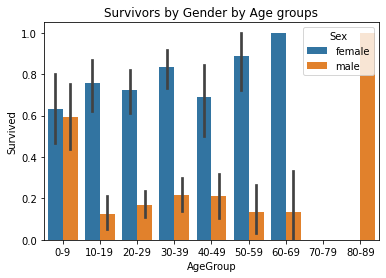

In [30]:
def age_group(age): #create age group intervals
    if 80 <= age <= 89:
        return '80-89'
    elif 70 <= age <= 79:
        return '70-79'
    elif 60 <= age <= 69:
        return '60-69'
    elif 50 <= age <= 59:
        return '50-59'
    elif 40 <= age <= 49:
        return '40-49'
    elif 30 <= age <= 39:
        return '30-39'
    elif 20 <= age <= 29:
        return '20-29'
    elif 10 <= age <= 19:
        return '10-19'
    elif 0 <= age <= 9:
        return '0-9'

titanic['AgeGroup'] = titanic.Age.apply(age_group) #create new column in dataframe

import seaborn as sns
ax=sns.barplot(x='AgeGroup', y='Survived', data=titanic.sort_values(by='AgeGroup'), hue='Sex') #plot Survivors by gender and by age group 

ax.set_title('Survivors by Gender by Age groups')

In [32]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_child,Family_onboard,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True,20-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,30-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,20-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,True,30-39
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,False,30-39


In [37]:
len(titanic[titanic["AgeGroup"]=='80-89']) #number of rows where column meets a value

1

In [38]:
len(titanic[titanic["AgeGroup"]=='70-79'])

6

In [39]:
print("Similar survival rate for 0-9 year olds both male and female,significantly lower survival rate for male aged 10-19 compared to women of same age. This trend continues for all other (higher) age groups. Perhaps no data recorded of survivors 70-79 and only 1 male aged 80-89 survived. This male was also the only person aged 80-89 who survived or not so a trend cannot be established")

Similar survival rate for 0-9 year olds both male and female,significantly lower survival rate for male aged 10-19 compared to women of same age. This trend continues for all other (higher) age groups. Perhaps no data recorded of survivors 70-79 and only 1 male aged 80-89 survived. This male was also the only person aged 80-89 who survived or not so a trend cannot be established
